# 03 - Trade-Off Viés-Variância, Métricas de Avaliação e Regressão Logística

Nessa aula, iremos tratar dos seguintes conteúdos:
- Trade-Off Viés-Variância;
- Métricas de Avaliação;
- Regressão Logística.

<img src="https://miro.medium.com/max/4056/1*ohfuav_OOrDTNQRUKpBQDA.png" width=800>

###  

## Trade-Off Viés-Variância

Veremos agora um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>


## Regressão Logística

Vimos que no caso mais amplo da regressão linear, temos o modelo como: <br><br>
$$
\begin{equation}
Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n = \beta^{T}X
\end{equation}
$$

Mas em regressão linear, temos como resposta do nosso modelo valores contínuos. E se ao invés disso, o nosso modelo devolve-se uma resposta binário ou classificação?<br><br>
É exatamente isso que buscamos com a Regressão Logística, ser capaz de classificar ou distinguir se o conjunto de dados pertence a uma classe ou não, ou mesmo para o caso de múltiplas classes.

Para poder fazer isso, vamos utilizar o auxílio da função logística, representada a seguir:<br><br>
$$
\begin{equation}
f(z) = \frac{e^{z}}{1 + e^{z}}
\end{equation}
$$

In [1]:
# importe das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Montar a Função Logística
# Vetor de valores z
z = np.linspace(-8, 8, 10000)

# Calcular a função logistica
logistic_z = np.exp(z)/(1 + np.exp(z))

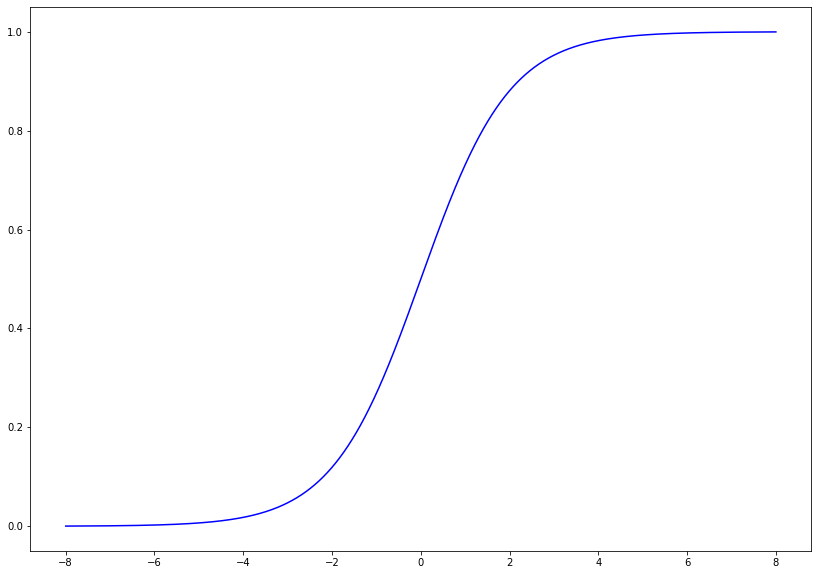

In [3]:
# Plote da função logística
plt.figure(figsize = (14, 10))
plt.plot(z, logistic_z, 'b-')
plt.show()

Conhecendo a função logística e a definição generalizada para regressão linear, define-se a função que descreve a regressão logística como:<br><br>
$$
\begin{equation}
P(Y | x) = \frac{e^{\beta^{T}X}}{1 + e^{\beta^{T}X}}
\end{equation}
$$<br><br>
Colocando uma definição mais formal seria que o objetivo da regressão logística é modelar a **probabilidade** $P(Y|x)$, onde dado x (variáveis) qual é a probabilidade dessas variáveis pertencerem a classe Y. Para o aprendizado do nosso modelo, a tarefa resumi-se em estimar os parâmetros $\beta^{T}$.

Naturalmente, $0 \le P(Y|x) \le 1$. Assim, por exemplo, se:
- $P(Y|x) \ge 0,5$: x pertence à classe 1
- $P(Y|x) < 0,5$: x pertence à classe 0

**Obs.:** este valor de 0,5 (50%) é usualmente chamado de *cutoff* ou *threshold*, e embora que o valor padrão para esse parâmetro seja de 50% na regressão logística, isso vai depender do tipo de problema que iremos tratar na modelagem!

Agora vamos pensar nos casos de estar contido ou não na classe Y, utilizando $P(Y|x)$ para determinar a probabilidade de pertencer a uma classe:<br><br>
$$
\begin{equation}
P(Y = 1  |  x) = \frac{e^{\beta^{T}X}}{1 + e^{\beta^{T}X}}
\end{equation}
$$<br><br>
Agora para determinar a probabilidade de $ P(Y = 0 | x)$:<br><br>
$$
\begin{equation}
P(Y = 0  |  x) = 1 - P(Y = 1  |  x) = \frac{1}{1 + e^{\beta^{T}X}}
\end{equation}
$$<br><br>
Por fim, vamos analisar e determinar o limiar onde vai ocorrer a separação da classe, esse ponto será onde $ P(Y = 1 | x) = P(Y = 0 | x)$:<br><br>
$$
\begin{equation}
\frac{e^{\beta^{T}X}}{1 + e^{\beta^{T}X}} = \frac{1}{1 + e^{\beta^{T}X}}
\end{equation}
$$<br><br>
Para a condição acima ser satisfeita, a equação $\beta^{T}X = 0$ tem que ser verdadeira. A solução para isso é na forma de hiperplanos, mas o mais importante aqui é se a superfície de separação linear!

In [5]:
# Instale o mlxtend caso não tenha disponível no seu ambiente
!pip install mlxtend

In [7]:
# Carrega outras libs auxiliares
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as skdata

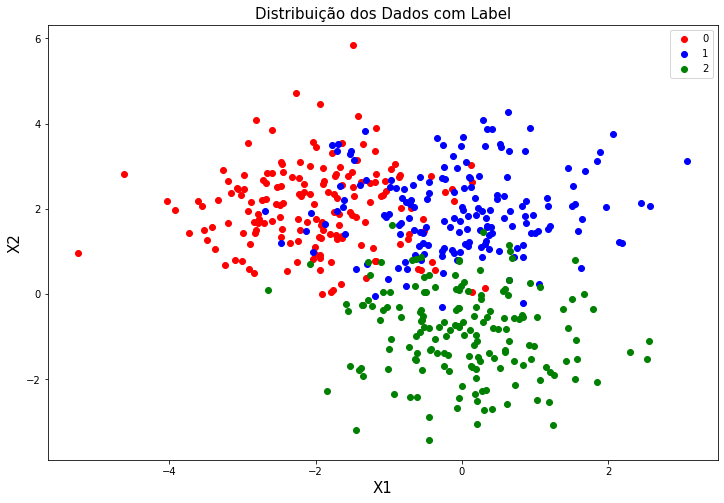

In [8]:
# Gera os dados em duas dimensões
#n_samples = 1000 # número de observações

# centro dos grupos
centers = [(-2, 2), (0, 2), (0, -1)]
X, y = skdata.make_blobs(n_samples=500, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))

# converte para o formato dataframe do Pandas
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green']
aux = 0
plt.figure(figsize=(12,8))
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title('Distribuição dos Dados com Label', fontsize=15)
plt.legend()
plt.show()

In [9]:
# import da Regressão Logistica
from sklearn.linear_model import LogisticRegression

In [10]:
# Instancia o classificador
model = LogisticRegression(max_iter = 1000)

In [11]:
# treino do modelo
model.fit(X, y)

LogisticRegression(max_iter=1000)

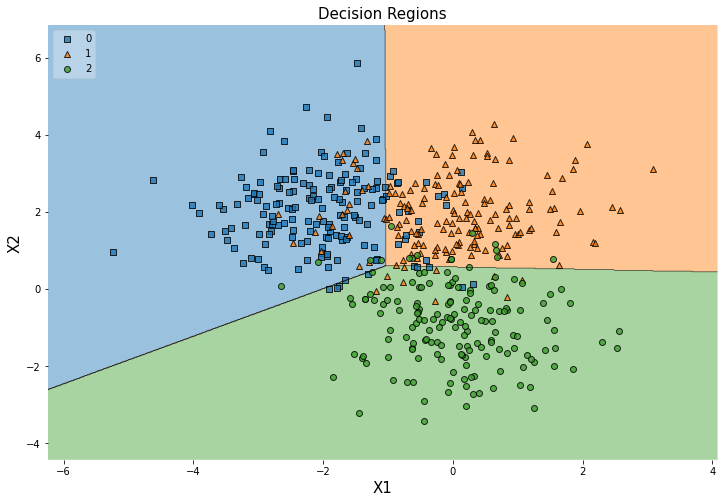

In [12]:
# Plote da região de separação do modelo
plt.figure(figsize=(12,8))
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.title('Decision Regions', fontsize=15)
plt.show()

### Exemplo

No exemplo prático, iremos utilizar um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* **'Daily Time Spent on Site':** tempo que o cliente ficou no site (em minutos);
* **'Age':** idade do cliente (em anos);
* **'Area Income':** média salarial (por ano) da região geográfica do cliente;
* **'Daily Internet Usage':** tempo médio (em minutos) que o cliente fica na internet;
* **'Ad Topic Line':** título do anúncio;
* **'City':** cidade do cliente;
* **'Male':** dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* **'Country':** país do cliente;
* **'Timestamp':** marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* **'Clicked on Ad':** dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não.

In [13]:
# leia os dados em '../datasets/advertising.csv'
df = pd.read_csv("./datasets/advertising.csv")

In [14]:
# de uma olhada nas 5 primeiras linhas
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [15]:
# dê uma olhada no info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
# olhe as estatísticas básicas
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [18]:
# dê uma olhada na distribuição do target
df['Clicked on Ad'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

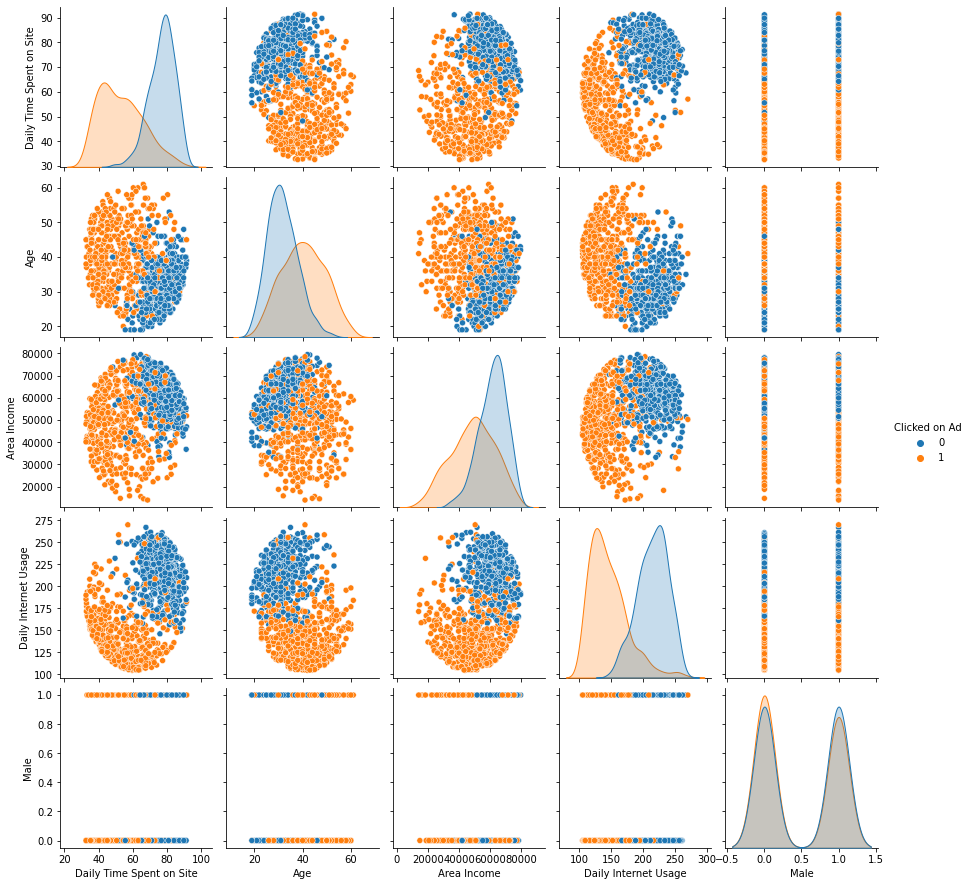

In [19]:
# faça um pairplot usando o hue como target -- isso é sempre uma boa prática em problemas de classificação!
sns.pairplot(df, hue = 'Clicked on Ad')

In [20]:
# crie as variáveis X e y, com as features e o target
# utilize todas as features numéricas - dica: df.select_dtypes(include=[np.number])
X = df.select_dtypes(include = [np.number]).drop(columns = "Clicked on Ad")
y = df['Clicked on Ad']

In [21]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [23]:
# Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split"
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [24]:
# normalização dos dados
from sklearn.preprocessing import StandardScaler

In [25]:
# Instanciar a normalização
scaler = StandardScaler()

In [26]:
# Aplicação da Normalização
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [27]:
#  Importe a classe do estimador que se deseja treinar
from sklearn.linear_model import LogisticRegression

In [28]:
# Instancie a classe do estimador, escolhendo os hiperparâmetros desejados (não há muitos)
model = LogisticRegression()

In [29]:
# Fit do Modelo
model.fit(X_train_std, y_train)

LogisticRegression()

In [31]:
# Predict do Modelo
y_pred = model.predict(X_test_std)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [32]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
468    1
935    0
428    1
7      1
155    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [46]:
# Calculo das probabilidades de cada uma das classes
y_proba = model.predict_proba(X_test_std)
y_proba

array([[1.99437810e-02, 9.80056219e-01],
       [3.24366108e-04, 9.99675634e-01],
       [1.45063489e-03, 9.98549365e-01],
       [3.70154371e-03, 9.96298456e-01],
       [9.87493393e-01, 1.25066066e-02],
       [5.31358444e-01, 4.68641556e-01],
       [9.79202445e-01, 2.07975549e-02],
       [2.91966995e-04, 9.99708033e-01],
       [9.89513772e-01, 1.04862277e-02],
       [5.21608582e-05, 9.99947839e-01],
       [9.94734894e-01, 5.26510556e-03],
       [1.35042901e-03, 9.98649571e-01],
       [7.29072456e-05, 9.99927093e-01],
       [9.85985051e-01, 1.40149486e-02],
       [2.70324636e-04, 9.99729675e-01],
       [3.34146123e-05, 9.99966585e-01],
       [8.85817425e-06, 9.99991142e-01],
       [2.37212119e-03, 9.97627879e-01],
       [9.56639427e-01, 4.33605734e-02],
       [1.15353919e-04, 9.99884646e-01],
       [9.94913537e-01, 5.08646314e-03],
       [1.13115047e-02, 9.88688495e-01],
       [4.03497271e-05, 9.99959650e-01],
       [8.80770504e-01, 1.19229496e-01],
       [9.953990

## 

## Métricas de Avaliação

Um importante processo durante a modelagem e termos alguma forma de avalairmos a qaulidade do que modelamos, e para isso utlizamos de **métricas de avaliação**.

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

No Sklearn, a notação muda um pouco:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:


<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">


Visto isso, as seguintes métricas numéricas de avaliação são bastante comuns na avaliação de modelos de classificação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=450>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, a métrica a ser otimizada é o F1! 


<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="400">

Quando começarmos a modelar com modelos de classificação daremos uma olhada mais a fundo nas métricas!

## 

In [33]:
# Bibliotecas para a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [34]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,   3],
       [  6, 148]], dtype=int64)

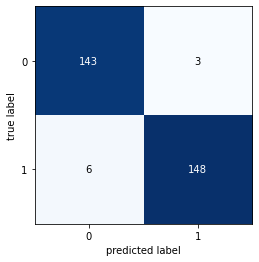

In [35]:
# Plote da Matriz de Confusão
plot_confusion_matrix(cm)
plt.show()

In [36]:
# Define os valores de TP, TN, FP e FN
TP = 148
TN = 143
FP = 3
FN = 6

Acurácia: 
$$
\begin{equation}
Acurácia = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}
$$

In [37]:
# Calculo da acurácia
acc = (TP + TN)/(TP + TN + FP + FN)
acc

0.97

In [38]:
# Função do scikit learn para acurácia
from sklearn.metrics import accuracy_score

# calculo da acuracia
print(accuracy_score(y_test, y_pred))

0.97


Precision: 
$$
\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}
$$

In [39]:
# Calculo do precision
precision = TP/(TP + FP)
precision

0.9801324503311258

In [40]:
# Função para o calculo do precision
from sklearn.metrics import precision_score

# Calculo do precision
print(precision_score(y_test, y_pred))

0.9801324503311258


Recall: 
$$
\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}
$$

In [41]:
# calculo do recall
recall = TP/(TP + FN)
recall

0.961038961038961

In [42]:
# biblioteca para calcular o recall
from sklearn.metrics import recall_score

# Calculo do recall
print(recall_score(y_test, y_pred))

0.961038961038961


F1-Score: 
$$
\begin{equation}
F1 = 2*\frac{precision * recall}{precision + recall}
\end{equation}
$$

In [43]:
# Calculo do f1 Score
f1 = 2*((precision * recall)/(precision + recall))
f1

0.9704918032786884

In [44]:
# Função para o F1 Score
from sklearn.metrics import f1_score

# calculo do F1 Score
print(f1_score(y_test, y_pred))

0.9704918032786884


In [45]:
# Função para o classification report
from sklearn.metrics import classification_report

# Print do classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## 

## Exercícios

Serão 3 datasets para praticar os conceitos de Regressão Logística. Usem de tudo que já aprendemos EDA, Limpeza e Preparação dos Dados. A descrição dos Datasets estão a seguir:

**1)** [COVID](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv): Esses dados estão no dataset *COVID.csv* e nele encontramos alguns dados sobre os casos de Covid no México, onde têm os sintomas e caractéristicas dos pacientes além do resultado do teste para Covid.

A descrição das variáveis estão indicadas abaixo:<br>
 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>

## 

**2)** [Admissão em Faculdades para Estudantes Indianos](https://www.kaggle.com/mohansacharya/graduate-admissions): Esses dados estão no dataset *Admission_Predict.csv* e nele encontramos alguns dados sobre estudantes indianos que tem interesse em ingressar na Universidade. As variáveis que estão disponíveis são:

- GRE Scores
- TOEFL Scores
- University Rating
- SOP: Statement of Purpose 
- LOR: Letter of Recommendation Strength
- CGPA: Undergraduate GPA
- Research Experience
- Chance of Admit

**DICA:** Vocês irão perceber que o valor da target 'Chance of Admit ' não vai estar em binário, para transformar os dados vocês podem utilizar a função [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) com um threshold de 0.5

## 

**3)** Dataset Iris: Dataset bem conhecido a respeito de 3 tipos da Iris, onde no dataset *Iris.csv* temos alguns dados sobre caractéristicas da flor e a marcação da *species*

## 